In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Datasets/restaurant_customer_satisfaction.csv')

In [5]:
data.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [7]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'VisitFrequency',
       'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize',
       'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder',
       'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating',
       'AmbianceRating', 'HighSatisfaction'],
      dtype='object')

## What is the average spend by gender?

In [10]:
avg_spend_by_gender = data.groupby('Gender')['AverageSpend'].mean()
avg_spend_by_gender

Gender
Female    105.471643
Male      105.850916
Name: AverageSpend, dtype: float64

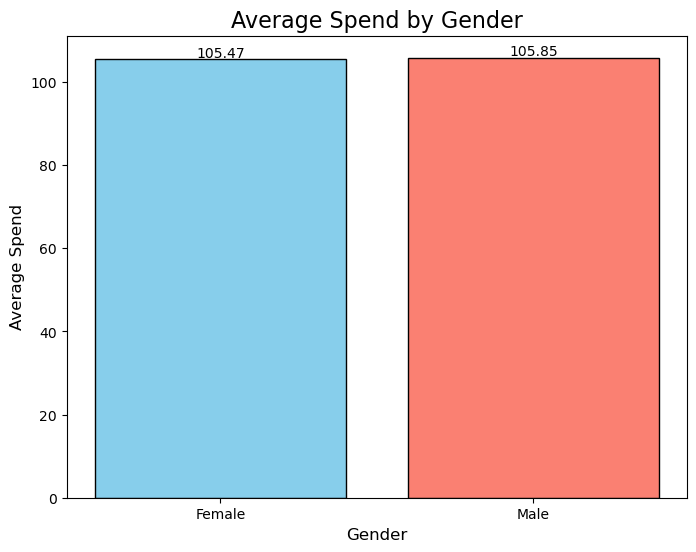

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(avg_spend_by_gender.index, avg_spend_by_gender.values, color=['skyblue', 'salmon'], edgecolor='black')


plt.title('Average Spend by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Spend', fontsize=12)

# To Annotate the bar values
for index, value in enumerate(avg_spend_by_gender.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)


plt.show()

## Distribution of Age

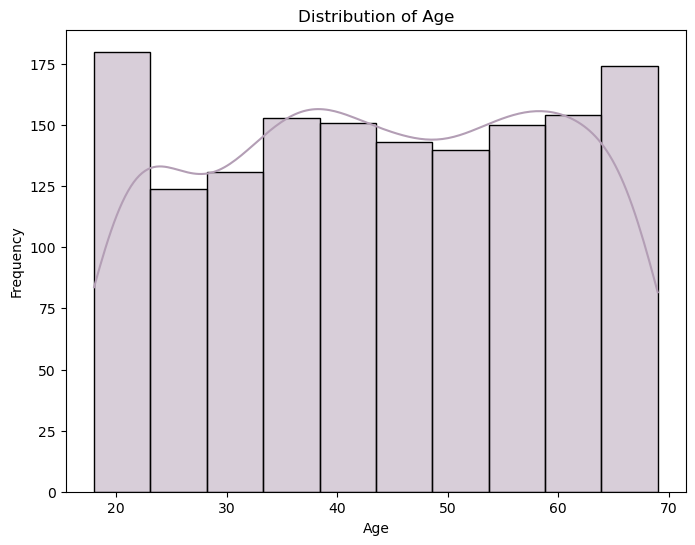

In [172]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=10 , color='#B39EB5')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## How does visit frequency vary with age groups?


In [25]:
x=data['VisitFrequency'].value_counts()
x

VisitFrequency
Weekly     606
Monthly    428
Rarely     313
Daily      153
Name: count, dtype: int64

AgeGroup
0-18     3.096774
19-35    3.074236
36-50    3.094170
51-65    3.161504
65+      3.106195
Name: VisitFrequencyNumeric, dtype: float64


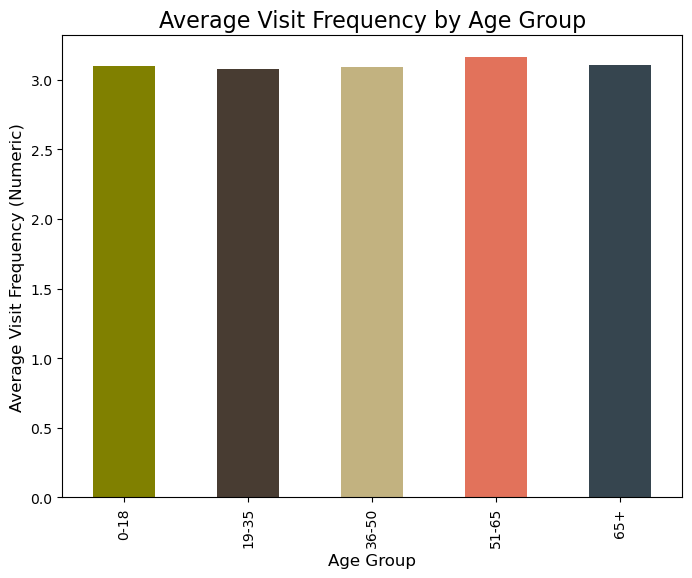

In [37]:
# Map the VisitFrequency categories to numerical values
frequency_mapping = {
    'Rarely': 1,
    'Monthly': 2,
    'Weekly': 4,  # Example mapping, adjust as needed based on your data
    'Daily': 7
}
# Create a new column for numeric visit frequencies
data['VisitFrequencyNumeric'] = data['VisitFrequency'].map(frequency_mapping)

# Handle missing values explicitly
data['VisitFrequencyNumeric'] = data['VisitFrequencyNumeric'].fillna(0)

# Create AgeGroup bins
data['AgeGroup'] = pd.cut(
    data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+']
)

# Group by AgeGroup and calculate the mean VisitFrequency
visit_frequency_by_age_group = data.groupby('AgeGroup', observed=False)['VisitFrequencyNumeric'].mean()

# Display the result
print(visit_frequency_by_age_group)

# Visualize the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
visit_frequency_by_age_group.plot(kind='bar', color=['#808000', '#483C32', '#C2B280', '#E2725B', '#36454F'])
, edgecolor='black')

# Add titles and labels
plt.title('Average Visit Frequency by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Visit Frequency (Numeric)', fontsize=12)
plt.show()


## What percentage of customers are Loyalty Program Members?


In [40]:
loyalty_percentage = (data['LoyaltyProgramMember'].sum() / len(data)) * 100
loyalty_percentage

48.0

## Which meal type is most popular?

In [43]:
popular_meal_type = data['MealType'].value_counts()
popular_meal_type

MealType
Dine-in     751
Takeaway    749
Name: count, dtype: int64

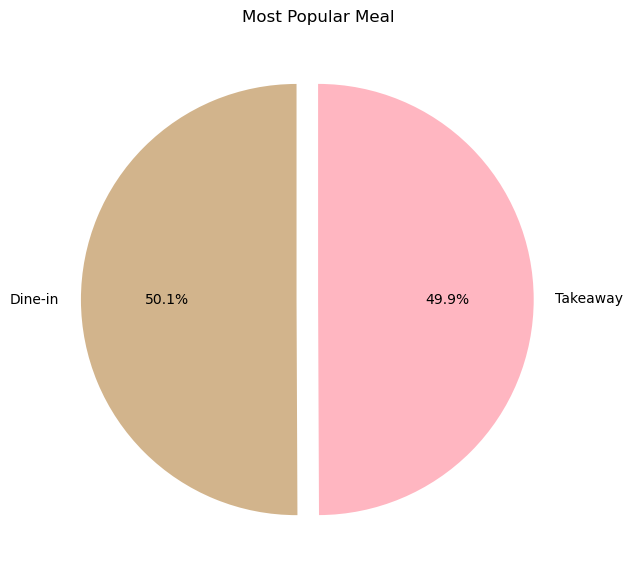

In [51]:
plt.figure(figsize=(7, 7))
plt.pie(popular_meal_type, labels=popular_meal_type.index, autopct='%1.1f%%', colors=['#D2B48C', '#FFB6C1'], startangle=90, explode=(0.1, 0)) 
plt.title('Most Popular Meal')
plt.show()

## What is the distribution of ratings (Service, Food, Ambiance)?



<Figure size 1000x600 with 0 Axes>

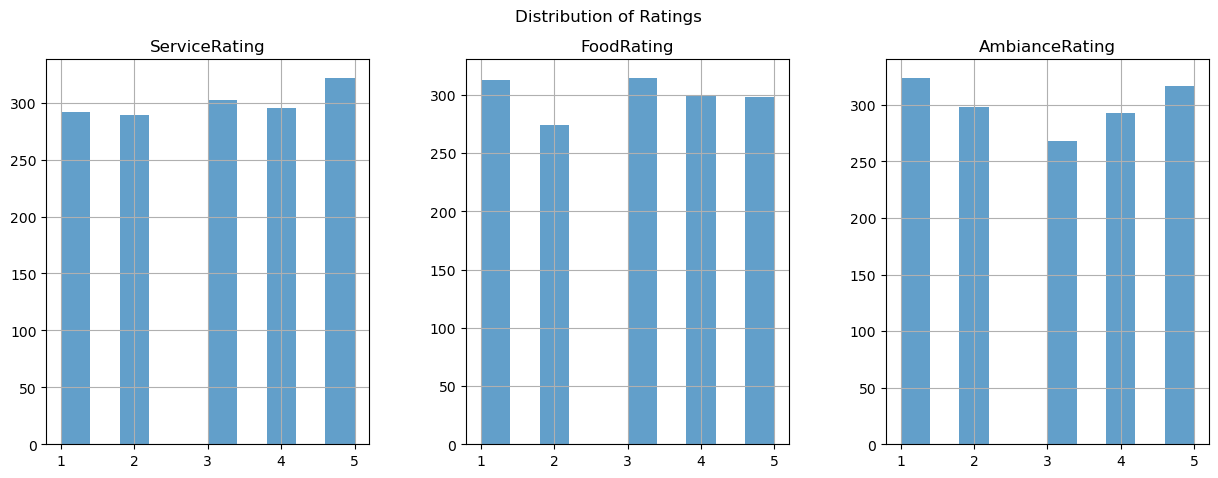

In [54]:
plt.figure(figsize=(10, 6))
data[['ServiceRating', 'FoodRating', 'AmbianceRating']].hist(bins=10, alpha=0.7, layout=(1, 3), figsize=(15, 5))
plt.suptitle('Distribution of Ratings')
plt.show()

##  What is the relationship between wait time and high satisfaction?

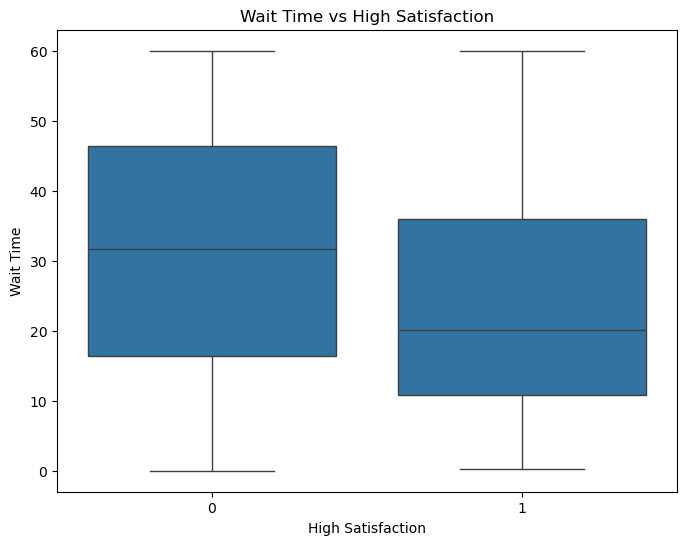

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HighSatisfaction', y='WaitTime', data=data)
plt.title('Wait Time vs High Satisfaction')
plt.xlabel('High Satisfaction')
plt.ylabel('Wait Time')
plt.show()

## What are the top 3 most visited dining occasions?

In [66]:
top_dining_occasions = data['DiningOccasion'].value_counts()
top_dining_occasions.head(3)

DiningOccasion
Celebration    519
Business       500
Casual         481
Name: count, dtype: int64

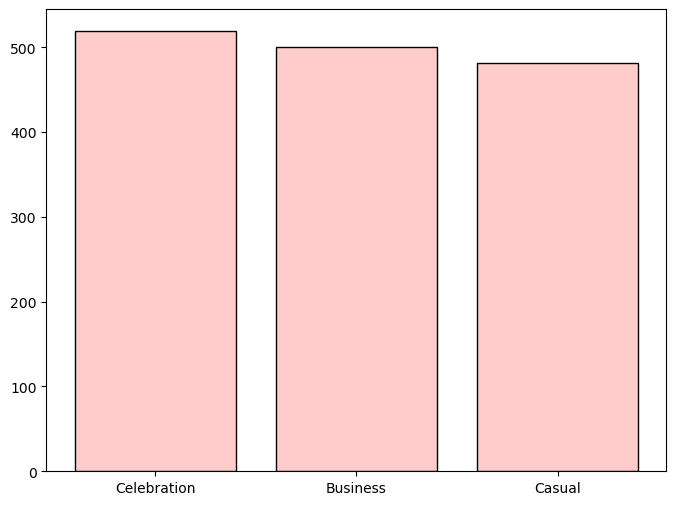

In [68]:

plt.figure(figsize=(8, 6))
plt.bar(top_dining_occasions.index.astype(str),top_dining_occasions.values, color='#FFCCCB', edgecolor='black')
plt.show()

## What factors (Income, Loyalty, Group Size) are most associated with High Satisfaction?

In [74]:
selected_columns = ['Income', 'LoyaltyProgramMember', 'GroupSize', 'HighSatisfaction']
correlation_matrix = data[selected_columns].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                         Income  LoyaltyProgramMember  GroupSize  \
Income                1.000000             -0.015756   0.062892   
LoyaltyProgramMember -0.015756              1.000000  -0.009098   
GroupSize             0.062892             -0.009098   1.000000   
HighSatisfaction      0.081905              0.162642  -0.084235   

                      HighSatisfaction  
Income                        0.081905  
LoyaltyProgramMember          0.162642  
GroupSize                    -0.084235  
HighSatisfaction              1.000000  


## Average Wait Time by Group Size

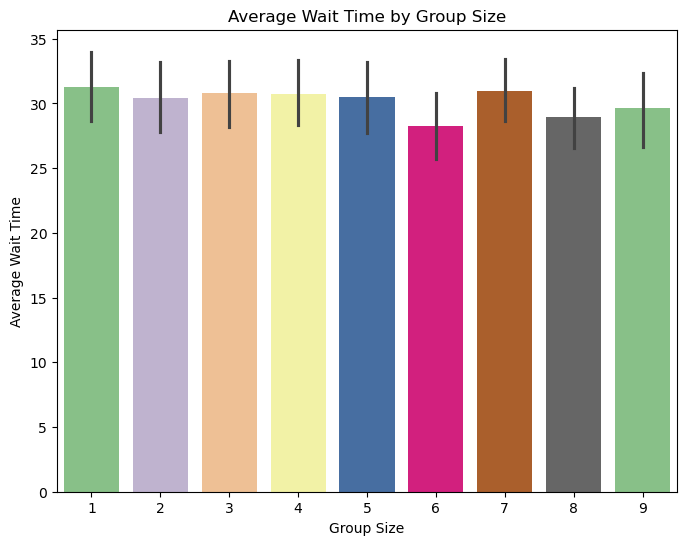

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(x='GroupSize', y='WaitTime', hue='GroupSize', data=data, palette='Accent', legend=False)
plt.title('Average Wait Time by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Wait Time')
plt.show()

## Meal Type Preferences by Gender

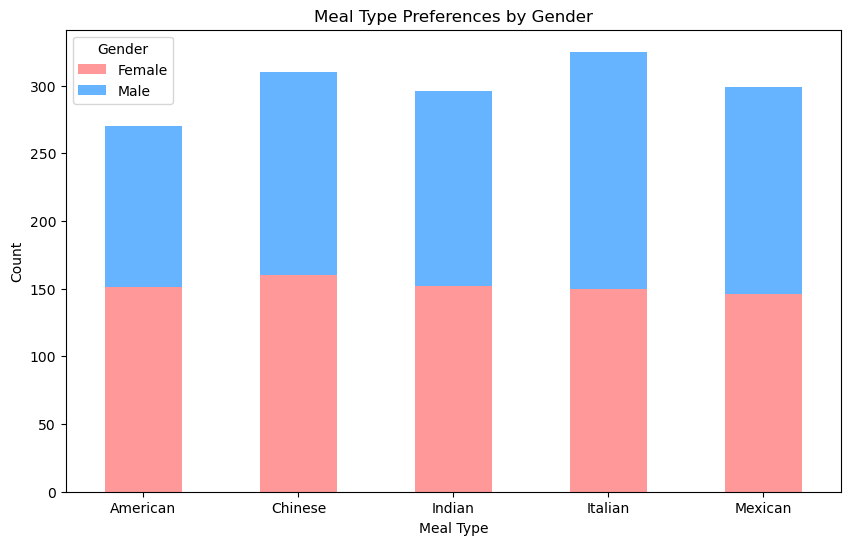

In [108]:
meal_by_gender = pd.crosstab(data['PreferredCuisine'], data['Gender'])
meal_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Meal Type Preferences by Gender')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

In [100]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'VisitFrequency',
       'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize',
       'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder',
       'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating',
       'AmbianceRating', 'HighSatisfaction', 'AgeGroup',
       'VisitFrequencyNumeric'],
      dtype='object')

In [102]:
data.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,...,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction,AgeGroup,VisitFrequencyNumeric
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,...,0,1,1,43.523929,2,5,4,0,19-35,4
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,...,0,0,0,57.524294,5,5,3,0,19-35,1
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,...,0,1,0,48.682623,3,4,5,0,36-50,4
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,...,0,0,0,7.552993,4,5,1,0,36-50,1
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,...,0,0,1,37.789041,2,3,5,0,51-65,2


## Service and Food Ratings Over Time of Visit

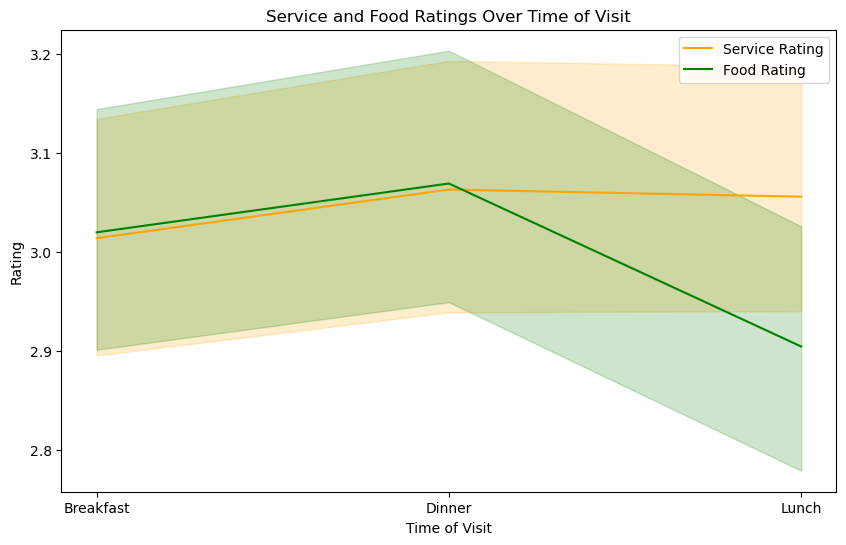

In [110]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimeOfVisit', y='ServiceRating', data=data, label='Service Rating', color='orange')
sns.lineplot(x='TimeOfVisit', y='FoodRating', data=data, label='Food Rating', color='green')
plt.title('Service and Food Ratings Over Time of Visit')
plt.xlabel('Time of Visit')
plt.ylabel('Rating')
plt.legend()
plt.show()

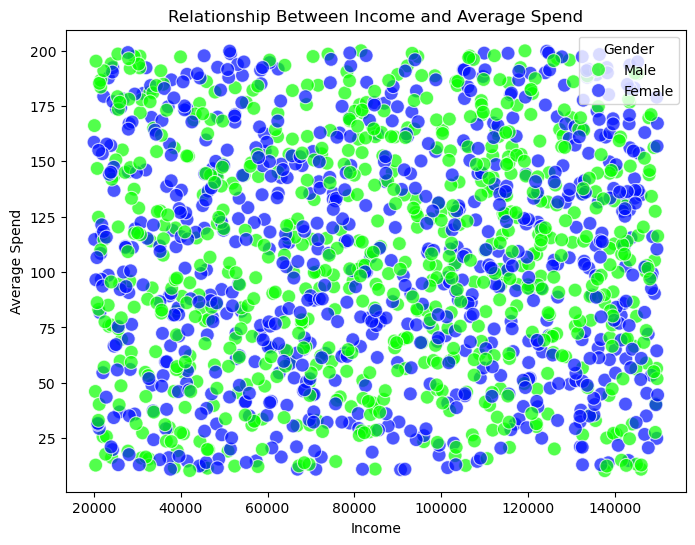

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='AverageSpend', data=data, hue='Gender', palette='hsv', s=100, alpha=0.7)
plt.title('Relationship Between Income and Average Spend')
plt.xlabel('Income')
plt.ylabel('Average Spend')
plt.show()

## Distribution of Service, Food, and Ambiance Ratings

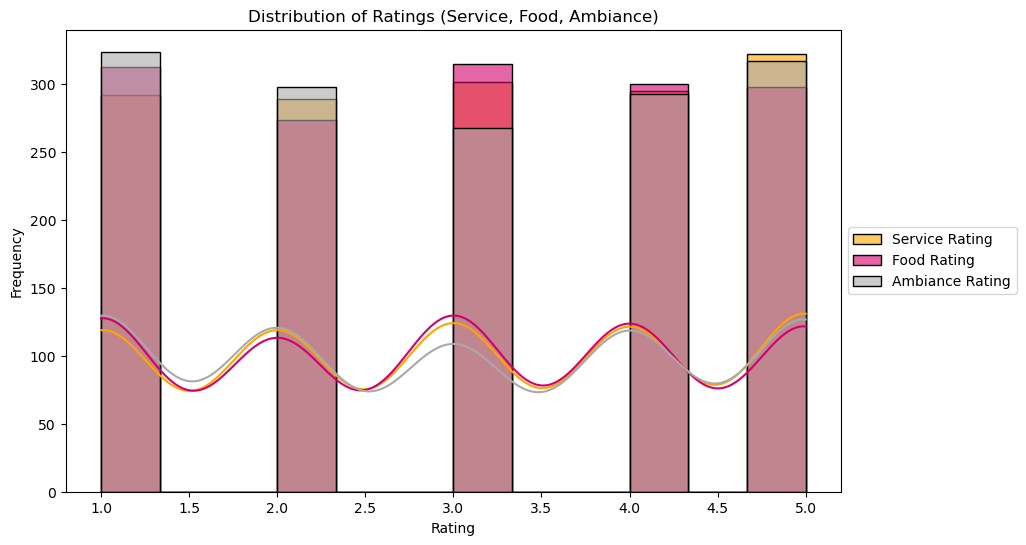

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ServiceRating'], kde=True, color='orange', label='Service Rating', alpha=0.6)
sns.histplot(data['FoodRating'], kde=True, color='#D5006D', label='Food Rating', alpha=0.6)
sns.histplot(data['AmbianceRating'], kde=True, color='#A9A9A9', label='Ambiance Rating', alpha=0.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Ratings (Service, Food, Ambiance)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Correlation Heatmap

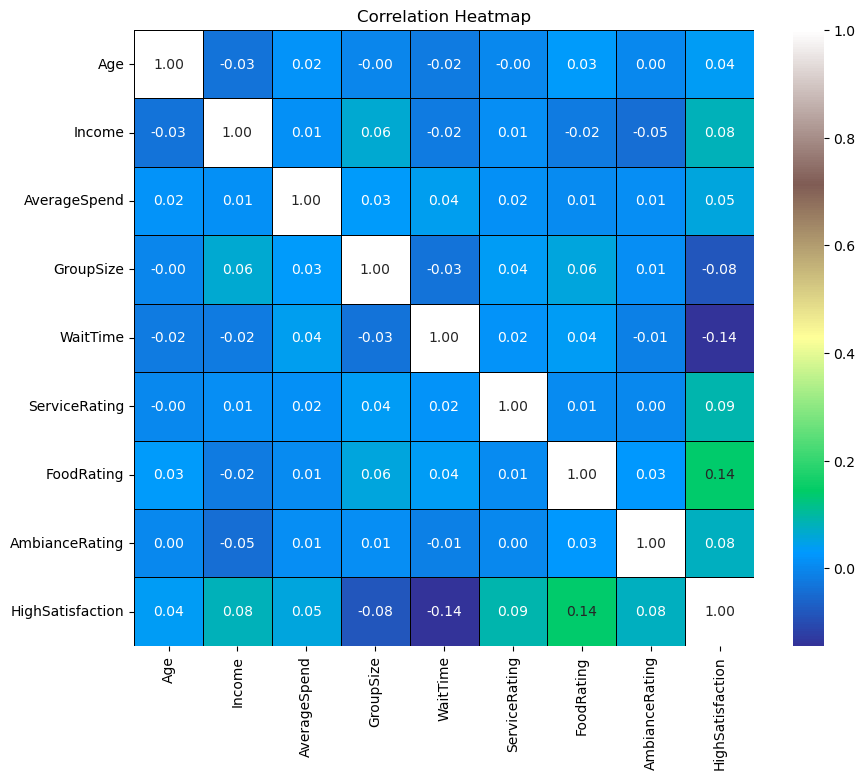

In [154]:
corr = data[['Age', 'Income',  'AverageSpend', 'GroupSize', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating', 'HighSatisfaction']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='terrain', fmt='.2f',linecolor='black', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()